# Beer Challenge

The main objective of this notebook is to respond the following questions regarding the Beer dataset:

1.	Rank top 3 Breweries which produce the strongest beers?
2.	Which year did beers enjoy the highest ratings? 
3.	Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?
4.	If you were to recommend 3 beers to your friends based on this data which ones will you recommend?
5.	Which Beer style seems to be the favorite based on reviews written by users? 
6.	How does written review compare to overall review score for the beer styles?
7.	How do find similar beer drinkers by using written reviews only?   


## Exploratory Data Analysis

This section contains an initial exploration to get familiarized with the dataset

In [48]:
# Python 3.7.9

In [49]:
import sys
import sklearn
import numpy as np
import os
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use('fivethirtyeight')

import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)

### Read data into pandas dataframe

In [50]:
dataset = "BeerDataScienceProject/BeerDataScienceProject.csv"
beer_df = pd.read_csv(dataset, encoding='latin-1')
beer_df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


 ### Data types and Statistics

In [51]:
# output the dataframe structure
beer_df.info()

# basic statistics for the dataframe 
beer_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   beer_ABV            508590 non-null  float64
 1   beer_beerId         528870 non-null  int64  
 2   beer_brewerId       528870 non-null  int64  
 3   beer_name           528870 non-null  object 
 4   beer_style          528870 non-null  object 
 5   review_appearance   528870 non-null  float64
 6   review_palette      528870 non-null  float64
 7   review_overall      528870 non-null  float64
 8   review_taste        528870 non-null  float64
 9   review_profileName  528755 non-null  object 
 10  review_aroma        528870 non-null  float64
 11  review_text         528751 non-null  object 
 12  review_time         528870 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 52.5+ MB


,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_taste,review_aroma,review_time
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.288700e+05
mean,7.017442,22098.466016,2598.423429,3.864522,3.758926,3.833197,3.765993,3.817350,1.224885e+09
std,2.204460,22158.284352,5281.805350,0.604010,0.685335,0.709962,0.669018,0.718903,7.605600e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,3.500000,3.500000,1.174613e+09
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.240366e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,4.000000,4.500000,1.288560e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.326277e+09


### Convert IDs to categorical

Even though they are numbers, all ids are categorical variables because they dont represent a quantitative value. Let's transform beer_beerId and beer_brewerId into categorical variables.

In [52]:
beer_df['beer_beerId'] = pd.Categorical(beer_df.beer_beerId)
beer_df['beer_brewerId'] = pd.Categorical(beer_df.beer_brewerId)
beer_df.dtypes

beer_ABV               float64
beer_beerId           category
beer_brewerId         category
beer_name               object
beer_style              object
review_appearance      float64
review_palette         float64
review_overall         float64
review_taste           float64
review_profileName      object
review_aroma           float64
review_text             object
review_time              int64
dtype: object

### Get unique values

In [53]:
#Get the uniqueness categorical variable
categorical = beer_df.select_dtypes(["object", "category"]).columns
for cat_col in categorical:
    print(f"{cat_col} : {beer_df[cat_col].nunique()} unique values(s)")

beer_beerId : 20200 unique values(s)
beer_brewerId : 1803 unique values(s)
beer_name : 18339 unique values(s)
beer_style : 104 unique values(s)
review_profileName : 22800 unique values(s)
review_text : 528371 unique values(s)


In [54]:
# Get the uniqueness discrete and continuous variables
numeric = beer_df.select_dtypes(["int", "float"]).columns
for num_col in numeric: # print every unique values
    print(f"{num_col} : {beer_df[num_col].nunique()} unique values(s)")

beer_ABV : 283 unique values(s)
review_appearance : 10 unique values(s)
review_palette : 9 unique values(s)
review_overall : 10 unique values(s)
review_taste : 9 unique values(s)
review_aroma : 9 unique values(s)
review_time : 527927 unique values(s)


### Check duplicate rows

In [55]:
#Check duplicate rows
beer_df. duplicated().sum()

0

There are not duplicate rows.

### Distribution of numerical columns

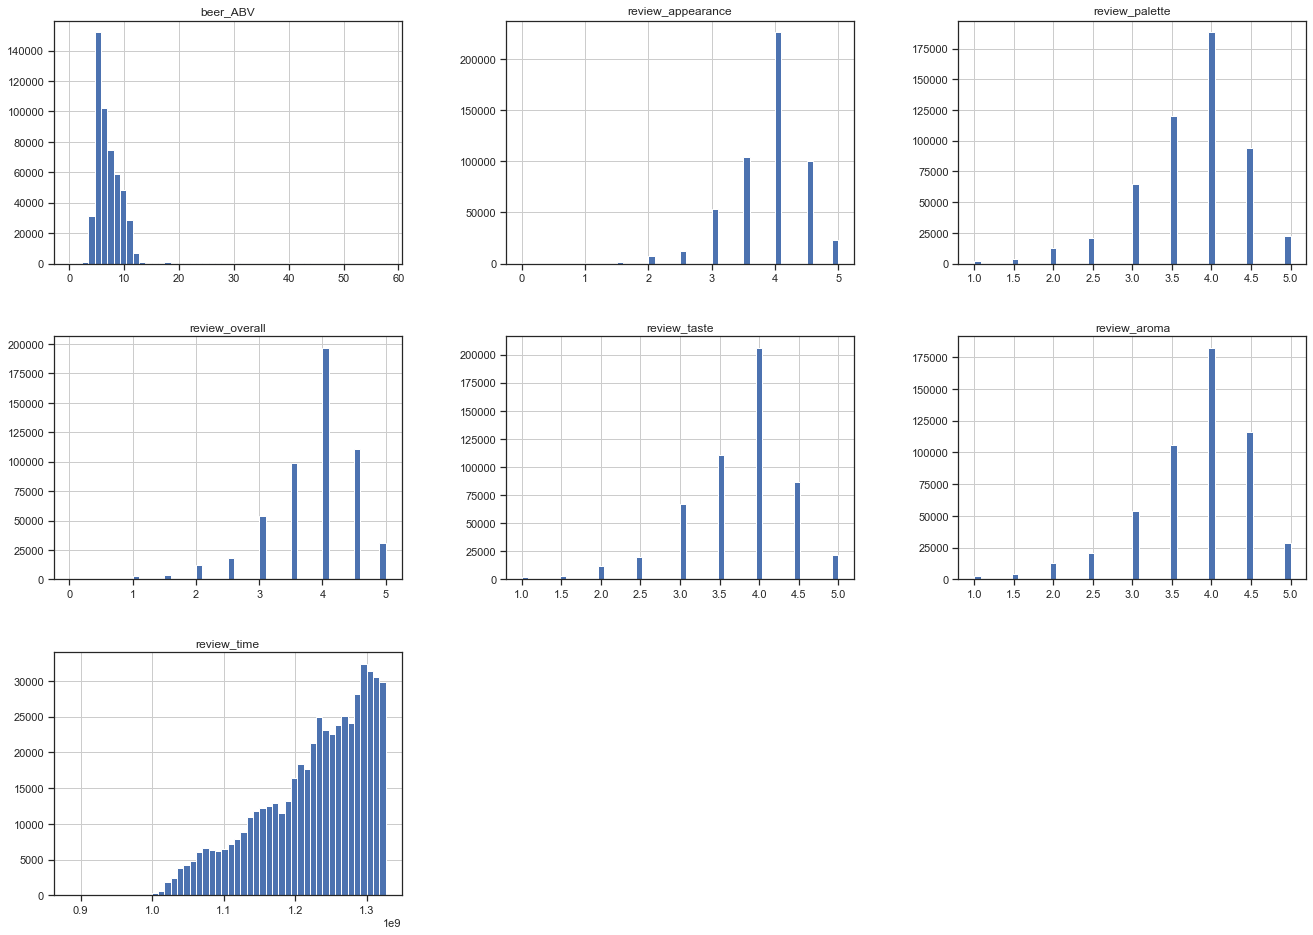

In [56]:
# generate histograms for the numerical columns in beer_df
beer_df.hist(bins=50, figsize=(20,15))
plt.show()

We can see that review_time and beer_ABV are continuous and the review columns are discrete values from 0 to 5

Let's see the boxplot of the continuous variables.

<AxesSubplot:>

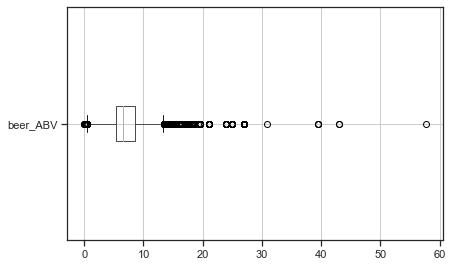

In [57]:
beer_df.boxplot(column=['beer_ABV'], vert=False)

<AxesSubplot:>

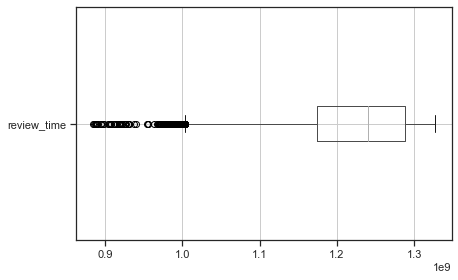

In [58]:
beer_df.boxplot(column=['review_time'], vert=False)

Given the values and distribution of review_time, I would say it is a timestamp but I will figure it out later.

### Check Null Values

In [59]:
#Check null values
beer_df.isnull().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

Let's investigate if beer_ABV being null values mean that the beer is non-alcoholic or that the value is really missing.

In [60]:
beer_df['beer_ABV'].describe()

count    508590.000000
mean          7.017442
std           2.204460
min           0.010000
25%           5.300000
50%           6.500000
75%           8.500000
max          57.700000
Name: beer_ABV, dtype: float64

In [61]:
beer_df[beer_df["beer_ABV"] < 0.05]

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
274878,0.01,20210,2444,Liber,Low Alcohol Beer,3.0,1.5,1.0,1.5,mdfb79,1.0,My girlfriend brought me back a couple random ...,1305671703
274879,0.01,20210,2444,Liber,Low Alcohol Beer,3.0,1.0,1.0,2.0,DoubleJ,1.0,I saw this in the fridge at the house Im stayi...,1260126065
274880,0.01,20210,2444,Liber,Low Alcohol Beer,2.0,1.5,1.5,1.5,schiaveto,1.0,Although Liber is the first brazilian lager wi...,1146516834


Sice we can find values close to 0, I am going to assume that the missing values in beer_ABV are in fact missing values.

We will deal with the missing values in beer_ABV, review_profileName and review_text later, depending on the insight we are looking for.

## Question 1: Rank Top 3 Breweries which produce the strongest beers

Since I concluded that Nan values in beer_ABV are actually Nan, let's remove rows where ABV is null. I am not applying any other method (like substituting for the mean) because that could mess up with the insight we are looking for.

In [62]:
#Generate a copy of the df that does not contain nas in beer_ABV column. Keep only ocolumns of interest
abv_beer_df = beer_df[beer_df['beer_ABV'].notna()][['beer_brewerId', 'beer_ABV', 'beer_beerId']]
abv_beer_df.info()
abv_beer_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508590 entries, 0 to 528796
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   beer_brewerId  508590 non-null  category
 1   beer_ABV       508590 non-null  float64 
 2   beer_beerId    508590 non-null  category
dtypes: category(2), float64(1)
memory usage: 10.4 MB


,beer_ABV
count,508590.000000
mean,7.017442
std,2.204460
min,0.010000
25%,5.300000
50%,6.500000
75%,8.500000
max,57.700000


Since we are going to work with mean ABV by brewer, let's remove the duplicate beers to avoid counting the same beer more than once when calculating the mean.

In [63]:
#Check duplicate rows
abv_beer_df. duplicated().sum()

493600

In [64]:
#Drop Duplicates
abv_beer_df.drop_duplicates(inplace=True)
abv_beer_df.describe()

,beer_ABV
count,14990.000000
mean,6.287156
std,2.098701
min,0.010000
25%,5.000000
50%,5.700000
75%,7.300000
max,57.700000


Let's get the mean ABV by breewer. I have decided to use the mean because it takes into account the number of elements. This is important because some breewers may have more reviews (entries in the dataset) than others.

In [65]:
#get the mean of beer_ABV by beer_brewerId and sort in descending order
mean_abv_beer_df = abv_beer_df.groupby('beer_brewerId', as_index=False).mean().sort_values(by=['beer_ABV'], ascending=False).rename(columns={"beer_ABV": "mean_ABV"})
mean_abv_beer_df.head()

,beer_brewerId,mean_ABV
784,6513,24.690000
175,736,13.500000
1644,24215,12.466667
881,8540,11.500000
663,5040,11.500000


We can observe that the brewers that on average create the strongest beers are: 6513, 736, 24215.

Let's get a column with the strongest beer for each brewer

In [66]:
#Merge abv_beer_df and mean_abv_beer_df dataframes to get the strongest beer for each brewer
max_mean_abv_beer_df = pd.merge(abv_beer_df.groupby('beer_brewerId', as_index=False)['beer_ABV'].max(), mean_abv_beer_df, how='inner', on=['beer_brewerId']).sort_values(by=['mean_ABV'], ascending=False)
max_mean_abv_beer_df.head()

,beer_brewerId,beer_ABV,mean_ABV
784,6513,57.7,24.690000
175,736,14.0,13.500000
1644,24215,16.1,12.466667
881,8540,12.0,11.500000
663,5040,12.0,11.500000


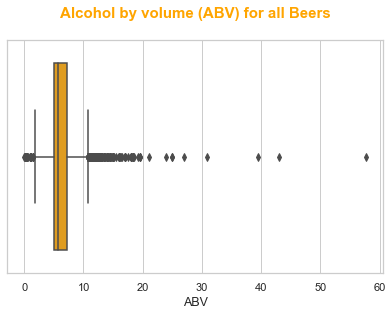

In [67]:
sns.set_style("whitegrid")
sns.boxplot(x=abv_beer_df["beer_ABV"], color='orange')
plt.xlabel("ABV", fontsize=12.5)
plt.ylabel("")
plt.title('Alcohol by volume (ABV) for all Beers\n', fontweight='bold', color="orange", fontsize=15)
plt.show()

In the boxplot we can see that the strongest beers have an ABV over 15 and the highest ABV is 57.7.

Get the top 3 breweries that produce on average the strongest beers and get the name of those breweries.
To map the id with the names I used the original dataset in kaggle: https://www.kaggle.com/datasets/rdoume/beerreviews
. However, harcoding is not good practice so in general I would have downloaded the dataset and mapped the ids with the names.

In [68]:
top_3 = max_mean_abv_beer_df[["mean_ABV", "beer_ABV"]][0:3]
top_3["brewerie_name"] = ["Schorschbräu", "Hurlimann Brewery", "Monks Porter House"]
top_3 = top_3.set_index('brewerie_name')
top_3.head()

,mean_ABV,beer_ABV
brewerie_name,,
Schorschbräu,24.690000,57.7
Hurlimann Brewery,13.500000,14.0
Monks Porter House,12.466667,16.1


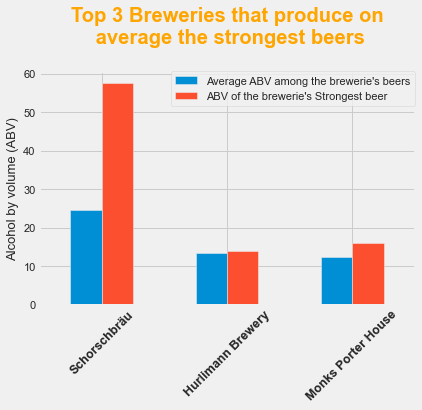

In [69]:
plt.style.use('fivethirtyeight')
#plt.barh(top_beer_styles['beer_style'],top_beer_styles['positive|mean'])
top_3.plot.bar()
plot = plt.title('Top 3 Breweries that produce on\n average the strongest beers\n', fontweight='bold', color = 'orange')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.legend(['Average ABV among the brewerie\'s beers', "ABV of the brewerie\'s Strongest beer"], bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0,)
#plt.xlim([0, 1])
plt.ylabel('Alcohol by volume (ABV)', fontsize=13)
plt.xlabel('')
plt.xticks(rotation=45, fontsize=12.5, fontweight='bold')
plt.show()


Comparing this barplot with the distribution of the ABV values in the boxplot I showed above, we can observe that:
- The top 1 breewer Schorschbräu produces the strongest beer across the whole dataset.
- The top 2 and top 3 breewers Hurlimann Brewery and Monks Porter House produce, on average, the strongest beers. However, they do not produce any of the beers ranked as the strongest (ABV above 15).

## Question 2.	Which year did beers enjoy the highest ratings?

For this part we are interested in exploring review_overall and review_time.

### Overall Review exploration

In [70]:
beer_df[['review_overall']].describe()

,review_overall
count,528870.000000
mean,3.833197
std,0.709962
min,0.000000
25%,3.500000
50%,4.000000
75%,4.500000
max,5.000000


In [71]:
#Check missing values
beer_df['review_overall'].isna().sum()

0

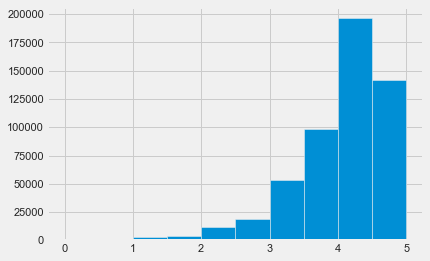

In [72]:
beer_df['review_overall'].hist()
plt.show()
#NOTE add title

As we saw in the EDA section, the ratings go from 0 to 5 points.

### Time Review exploration

In [73]:
#Check missing values
beer_df['review_time'].isna().sum()

0

In [74]:
beer_df[['review_time']].describe()

,review_time
count,5.288700e+05
mean,1.224885e+09
std,7.605600e+07
min,8.843904e+08
25%,1.174613e+09
50%,1.240366e+09
75%,1.288560e+09
max,1.326277e+09


These numbers suggest that the column review_time is a timestamp for when th review was posted. Let's investigate a little bit more.

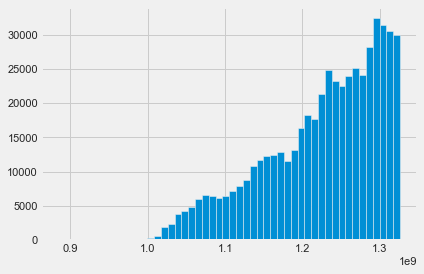

In [75]:
beer_df['review_time'].hist(bins=50)
plt.show()

Let's convert the max and min values to UTC time to see if they make sense.

In [76]:
from datetime import datetime

timestamp_max = beer_df['review_time'].max()
timestamp_min = beer_df['review_time'].min()
dt_object_max = datetime.fromtimestamp(timestamp_max)
dt_object_min = datetime.fromtimestamp(timestamp_min)
print("Min UTC =", dt_object_min)
print("Max UTC =", dt_object_max)

Min UTC = 1998-01-09 19:00:01
Max UTC = 2012-01-11 05:10:56


Year 1998 seems a little too early to have online reviews but let's consider it valid. We are now making our conclussion based in two facts:
- The earliest and latest date of the reviews make sense 
- The histogram shows how the number of reviews increase while we approach to recient years, which also makes sense.

With this, we conclude that column review_time is the timestamp of the review.

Let's now explore the relationship between the time period and the beer ratings.

For this task, I am going to collapse the rows by year and calculate the mean of the reviews for that specific year.

Let's transform our dataframe a little bit by addng relevant features like the time in UTC format.

In [77]:
#create a new column review_time_utc with the timestamps converted to UTC
beer_df['review_time_utc'] = beer_df['review_time'].apply(lambda x: datetime.fromtimestamp(x))
beer_df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_time_utc
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,2009-02-16 15:57:03
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,2009-03-01 08:44:57
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,2009-03-01 09:10:04
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,2009-02-15 14:12:25
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,2010-12-30 13:53:26


In [78]:
#For simplicity, let's also add a new column just with the year
beer_df['review_year'] = beer_df['review_time_utc'].apply(lambda x: x.year)
beer_df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_time_utc,review_year
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,2009-02-16 15:57:03,2009
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,2009-03-01 08:44:57,2009
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,2009-03-01 09:10:04,2009
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,2009-02-15 14:12:25,2009
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,2010-12-30 13:53:26,2010


Let's see if the same user has ever made more than one reviews for the same beer. In that case, we will keep the most recent row since the beer may have changed along time (we consider that the user's preferences have remained the same).

In [79]:
#Check for duplicated rows according to user name and beer id
beer_df[beer_df.duplicated(subset=['review_profileName','beer_beerId'])][['beer_beerId', 'review_profileName', 'review_overall', 'review_time_utc']]

,beer_beerId,review_profileName,review_overall,review_time_utc
187,25414,barleywinefiend,4.0,2010-06-21 22:27:01
415,10784,barleywinefiend,3.5,2010-06-21 22:22:12
847,10785,flexabull,4.5,2010-03-05 19:16:14
869,10785,RedDiamond,4.0,2009-07-30 17:59:35
1329,436,francisweizen,3.0,2003-03-20 12:41:52
...,...,...,...,...
528149,2937,ZAP,3.0,2002-07-20 15:38:44
528363,8026,lacqueredmouse,3.5,2005-02-09 01:42:38
528420,2176,scubachopper,2.5,2008-11-24 09:05:03
528497,2176,basica,2.5,2007-06-26 13:35:58


There are 4777 duplicated reviews (same user about same beer in different times)

We are generating a new dataframe tha does not contain those duplicates, keeping only the most recent review across the duplicates.

In [80]:
reviews_times_beer_df = beer_df.sort_values('review_time_utc').drop_duplicates(subset=['review_profileName','beer_beerId'], keep='last')
#Keep columns of interst
reviews_times_beer_df = reviews_times_beer_df[['beer_beerId', 'review_overall', 'review_year']]
reviews_times_beer_df.head()

,beer_beerId,review_overall,review_year
286219,111,4.0,1998
293628,110,4.5,1998
78358,2671,4.5,1998
358254,2387,4.0,1998
358219,2092,3.5,1998


Now we have cleaned our data, we can collapse the rows by year and calculate the mean of the reviews for that year

In [81]:
#get the mean of beer_ABV by beer_brewerId and sort in descending order
mean_reviews_year_beer_df = reviews_times_beer_df.groupby('review_year', as_index=False).mean().rename(columns={"review_overall": "mean_review_overall"})
mean_reviews_year_beer_df.sort_values(by=['mean_review_overall'], ascending=False)

,review_year,mean_review_overall
2,2000,4.187500
1,1999,4.000000
3,2001,3.927966
0,1998,3.891304
12,2010,3.864512
11,2009,3.862591
10,2008,3.831662
7,2005,3.830677
14,2012,3.829416
13,2011,3.827391


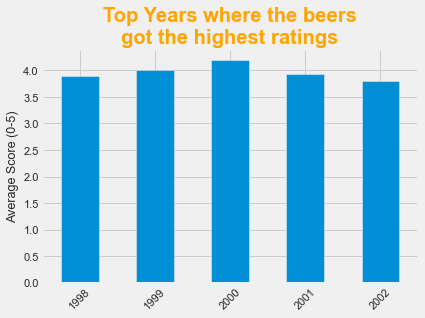

In [83]:
top_years = mean_reviews_year_beer_df[['review_year', 'mean_review_overall']][0:5].set_index("review_year")
top_years.plot.bar()
plot = plt.title('Top Years where the beers\ngot the highest ratings', fontweight='bold', color = 'orange')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.legend().remove()
#plt.xlim([0, 1])
plt.ylabel('Average Score (0-5)', fontsize=12.5)
plt.xlabel('')
plt.xticks(rotation=45)
plt.show()

It looks like the period from 1998 to 2002 were good years, but year 2000 was the best year for the beer lovers!

## Question 3.	Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

For this question I am considering overall review as the category that tells us the quality of a beer. 
To find out which features affect the quality of a beer, let's start plotting the correlation between the overall reviews and the beer characteristics.

In [95]:
corr_matrix = beer_df[["review_overall", "review_aroma", "review_taste", "review_palette", "review_appearance"]].corr()
# get correlation of each variable with review_all in descending order of correlation values
corr_matrix["review_overall"].sort_values(ascending=False)

review_overall       1.000000
review_aroma         0.783002
review_taste         0.692454
review_palette       0.601971
review_appearance    0.486687
Name: review_overall, dtype: float64

c:\Users\marin\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


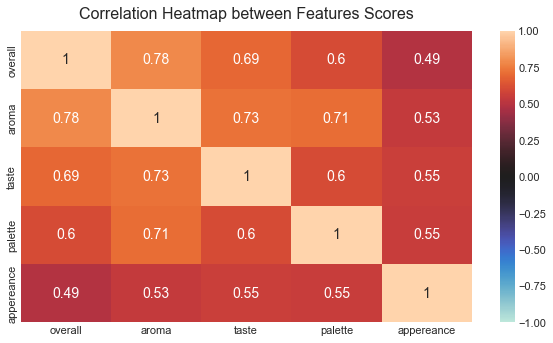

In [112]:
labels = ["overall", "aroma", "taste", "palette", "appereance"]
plt.figure(figsize=(9, 5))
mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
heatmap = sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='icefire', xticklabels=labels, yticklabels=labels)
heatmap.set_title('Correlation Heatmap between Features Scores', fontdict={'fontsize':16}, pad=12);

In general, we can see a pretty strong positive correlation between these features. It seems that aroma, taste, palette and apperance are positively correlated with a better rating, which is and indicator of a linear relationship between the overall review score and the individual scores of the features under study.

In [ ]:
features = ["review_aroma", "review_taste", "review_palette", "review_appearance"]
beer_df[features].describe()

,review_aroma,review_taste,review_palette,review_appearance
count,528870.000000,528870.000000,528870.000000,528870.000000
mean,3.817350,3.765993,3.758926,3.864522
std,0.718903,0.669018,0.685335,0.604010
min,1.000000,1.000000,1.000000,0.000000
25%,3.500000,3.500000,3.500000,3.500000
50%,4.000000,4.000000,4.000000,4.000000
75%,4.500000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In the histograms showed at the beggining of this notebook we can se that the reviews go from 0 to 5 stars in steps of 0.5. However, reviews go from 1 to 5 starts and it doesnt make sense having a 0. Areview of zero may mean "no review". Let's check by getting the number of 0 points reviews.

In [ ]:
for i in features:
    print("#0 scores in feature ",i, ": ", len(beer_df[beer_df[i]==0]))

#0 scores in feature  review_aroma :  0
#0 scores in feature  review_taste :  0
#0 scores in feature  review_palette :  0
#0 scores in feature  review_appearance :  3


Having a 0 in a review does not look usual so let's remove those 3 rows where review_appearance is 0.

In [ ]:
beer_df.drop(beer_df[beer_df["review_appearance"] == 0].index, inplace=True)
beer_df[features].describe()

,review_aroma,review_taste,review_palette,review_appearance
count,528867.000000,528867.000000,528867.000000,528867.000000
mean,3.817361,3.766001,3.758930,3.864544
std,0.718892,0.669010,0.685332,0.603942
min,1.000000,1.000000,1.000000,1.000000
25%,3.500000,3.500000,3.500000,3.500000
50%,4.000000,4.000000,4.000000,4.000000
75%,4.500000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


Now all the reviews are in the same range from 1 to 5.

I want to find if a linear relationship exists between review_overall and the four factors aroma, taste, palette and appearance. For so, I am going to fit a linear regression between the overall review and each of the predictors individually, and compare the R-squared statistic and regression coefficient across the fits.

In [ ]:
from statsmodels.api import OLS
features = ["review_aroma", "review_taste", "review_palette", "review_appearance"]
x = beer_df[["review_overall"]]

for i in features:
    y = beer_df[[i]]
    model = OLS(x, y)
    result = model.fit()
    print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:         review_overall   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                          3.574e+07
Date:                Fri, 21 Oct 2022   Prob (F-statistic):                        0.00
Time:                        14:04:22   Log-Likelihood:                     -3.5197e+05
No. Observations:              528867   AIC:                                  7.039e+05
Df Residuals:                  528866   BIC:                                  7.039e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

Let's annalize de coefficients (slopes) of the LR:

    - Aroma:      0.9962 
    - Taste:      1.0092
    - Palette:    1.0070
    - Appearance: 0.9819 

Taste has the biggest coefficient which makes it the most descriptive predictor for our response overall review.

But let's also see how well the model explains the variability in the response by looking at the R-Squared statistics:

    - Aroma:      0.985
    - Taste:      0.980
    - Palette:    0.974
    - Appearance: 0.975 

All the models explain more than 95% of the variability in overall review so we conclude they are very good fits.

With this, we can conclude that these factors are relevant to the users when defining the quality of a beer. Showed below from most to least important:

    - Taste
    - Palette
    - Aroma
    - Appearance

So with these findings regarding the positive linnear relationship between the quality of a beer and its features... we basically proved the obvious! users don't rate good a beer that smells, looks or tastes bad!

## Question 4. If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

For this question I am going to use my personal criterion. I really like fruity beers so they are the type of beers that I would recomment. Now I just have to figure out the way of measuring "fruitiness" in this dataset.

The first thing that comes to my head is trying to find the lexem fruit in the reviews and hope that it is something recurrent. For so, let's do some preprocessing of the texts introduced by the users.

In [ ]:
#Check null values
beer_df["review_text"].isnull().sum()

119

In [ ]:
#Copy dataframe without those empty reviews, keeping the original indices though
text_beer_df = beer_df[beer_df["review_text"].notna()]
text_beer_df["review_text"].isnull().sum()

0

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import collections
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import words
from nltk.corpus import stopwords

In [ ]:
def get_preprocessed_text(text, remove_stop_words = True):
    text = text.lower() #lowe case
    text = re.sub("\s\s+", " ", text) #remove extra spaces
    text = text.encode('ascii',errors='ignore').decode() #Remove non-ASCII characters
    text = re.sub(r'[0-9]', '', text) #Remove numbers
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text) #tokenize
    #filtered_tokens =[t for t in tokens if t in set(nltk.corpus.words.words())] #keep words included in the english dictionary
    if remove_stop_words:
        filtered_tokens =[t for t in tokens if t not in stopwords.words('english')] #remove stop words
        clean_text = ' '.join(filtered_tokens) #concatenate to export as a string
    else:    
        clean_text = ' '.join(tokens) #concatenate to export as a string

    return clean_text

In [ ]:
#NOTE Run this cell just the first time. Then use the saved file beer_dataset_preprocessed_reviews.csv instead
text_beer_df['clean_text'] = text_beer_df['review_text'].apply(lambda x: get_preprocessed_text(x))
text_beer_df.to_csv("beer_dataset_preprocessed_reviews_with_stop_words.csv", index=False)

In [ ]:
text_beer_df = pd.read_csv('beer_dataset_preprocessed_reviews.csv')
text_beer_df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_time_utc,review_year,clean_text,Fruity
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823,2009-02-16 15:57:03,2009,lot foam lot smell banana lactic tart good sta...,"<re.Match object; span=(19, 25), match='banana'>"
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097,2009-03-01 08:44:57,2009,dark red color light beige foam average smell ...,"<re.Match object; span=(131, 136), match='fruit'>"
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604,2009-03-01 09:10:04,2009,almost totally black beige foam quite compact ...,NaN
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145,2009-02-15 14:12:25,2009,golden yellow color white compact foam quite c...,"<re.Match object; span=(59, 63), match='pear'>"
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206,2010-12-30 13:53:26,2010,according website style caldera cauldron chang...,"<re.Match object; span=(212, 218), match='oran..."


Let's find the lexem "fruit" across the written reviews. I do not have to look for any other derived form of this word because in the preprocessing phase i applied lemmatization.

In [ ]:
text_beer_df[text_beer_df["clean_text"].str.contains('fruit')][['review_overall', 'clean_text', 'beer_beerId', 'beer_name']].sort_values('review_overall', ascending=False)

,review_overall,clean_text,beer_beerId,beer_name
237583,5.0,almost clear ruby brown body sexy thin white h...,7320,Oatmeal Porter
173439,5.0,really nice looking brew pours crystal clear d...,273,Double Bag
173791,5.0,pours dark mahogany finger dark tan head reced...,51679,Imperial Porter (Brewmaster Series)
387499,5.0,pours pale orange topped fizzy cream colored t...,8808,Haver Ale
273269,5.0,got one recent trade rgtravers really thank ry...,39055,Wild Dog Barrel-Aged Horn Dog
...,...,...,...,...
396422,1.0,pint bottle serving size appearance pours mudd...,3535,Thames Welsh ESB
128994,1.0,oz bottle brewed bottled pours dark brown smal...,32963,XXX Warlock Double Imperial Stout
499730,1.0,beer tap lucky baldwins barelywine festival ma...,2965,XS Old Crustacean
316415,1.0,got costco winter sampler huge mistake drank o...,1903,Samuel Adams Cranberry Lambic


All of the reviews in the table above contains the word fruit.

Now, I want to go a little bit further by checking also for the existence of different fruit lexems in the reviews.

In [ ]:
#Get key words (fruits) from file fruits.txt
my_file = open("fruits.txt", "r")
data = my_file.read()
key_words = data.split(" ")
my_file.close()
key_words[0:8]

['apple',
 'apricot',
 'avocado',
 'banana',
 'berry',
 'blackberry',
 'orange',
 'blueberry']

In [ ]:
#Add column with flag Fruity set to true if any of the key words is contained in the review
text_beer_df["Fruity"] = text_beer_df['clean_text'].apply(lambda x: re.compile('|'.join(key_words),re.IGNORECASE).search(x))
#1min

Get the reviews that include any of the fruity words!

In [ ]:
#Print rows that contain one or more key_words
text_beer_df[text_beer_df["Fruity"].notna()][['review_overall', 'clean_text', 'beer_beerId', 'beer_name']].sort_values('review_overall', ascending=False)[0:10]

,review_overall,clean_text,beer_beerId,beer_name
409746,5.0,poured oz bottle pint glass body coppery amber...,15881,Tröegs Nugget Nectar
410322,5.0,nice orange color real head speak good aroma p...,15881,Tröegs Nugget Nectar
306680,5.0,pours clear golden color nice one finger white...,54904,Samuel Adams Noble Pils
306670,5.0,poured oz bottle pilsner glass beer pours brig...,54904,Samuel Adams Noble Pils
410254,5.0,poured oz bottle shaker pint glass appears cle...,15881,Tröegs Nugget Nectar
410260,5.0,appearance nice orange color two finger thick ...,15881,Tröegs Nugget Nectar
175477,5.0,appearance beer typical hefeweizen look golden...,30099,Hefeweizen
410265,5.0,hearing praise pa brew give shot saw one local...,15881,Tröegs Nugget Nectar
520880,5.0,another great one sam smith pitch black good c...,572,"Samuel Smith's, The Famous Taddy Porter"
410270,5.0,growler andy bogota nj still nug cask also tod...,15881,Tröegs Nugget Nectar


All of those reviews seem to mention fruits but I want to make sure that I recommend my friends the most popular and best rated beers. For so, I want to check the popularity of the beers by counting their number of reviews.

In [ ]:
#Create df with # reviews per beer id
review_counts = text_beer_df.groupby(['beer_beerId'], as_index=False)['review_overall'].count().rename(columns={"review_overall": "count_review_overall"}).sort_values('count_review_overall', ascending=False)
review_counts[0:10]

,beer_beerId,count_review_overall
468,1904,2999
74,276,2586
3003,11757,2502
657,2671,2492
15,34,2480
23,104,2417
81,355,2231
157,645,2170
7586,30420,2028
137,571,2025


Let's also create a dataframe with the average overall score of each beer

In [ ]:
#group by beer id and get average overall review
mean_score_beer_df = text_beer_df.groupby(['beer_beerId'], as_index=False)['review_overall'].mean().rename(columns={"review_overall": "mean_review_overall"}).sort_values('mean_review_overall', ascending=False)
mean_score_beer_df[0:10]

,beer_beerId,mean_review_overall
14062,55434,5.0
3183,12413,5.0
7747,31085,5.0
19811,75949,5.0
9678,39026,5.0
7722,30996,5.0
7709,30948,5.0
12514,49583,5.0
5419,21377,5.0
12528,49677,5.0


Now we are ready to merge those tables and get the most popular fruity beers (many times rated) with the highest quality (better rated)!

In [ ]:
#Merge review_counts and mean_score_beer_df dataframes by beer_beerId
fruity_beers = pd.merge(review_counts, mean_score_beer_df, how='inner', on=['beer_beerId']).sort_values(by=['count_review_overall','mean_review_overall'], ascending=False)
fruity_beers.head()


,beer_beerId,count_review_overall,mean_review_overall
0,1904,2999,4.168556
1,276,2586,4.245940
2,11757,2502,4.354516
3,2671,2492,3.966091
4,34,2480,4.297581


Let's get the top 5 beers according to their average score. Again, I have manually performed the task of mapping  the beer ids with their real name by checking the original dataset (https://www.kaggle.com/datasets/rdoume/beerreviews).

In [ ]:
top_fruity_beers = fruity_beers[["beer_beerId", "mean_review_overall"]][0:5].sort_values("mean_review_overall")[0:5]
top_fruity_beers["beer_name"] = ["Sierra Nevada Celebration Ale", "Sierra Nevada Pale Ale", "Founders Breakfast Stout", "Sierra Nevada Bigfoot Barleywine", "La Fin Du Monde"]
top_fruity_beers = top_fruity_beers[["beer_name", "mean_review_overall"]]#.set_index("beer_name")

No handles with labels found to put in legend.


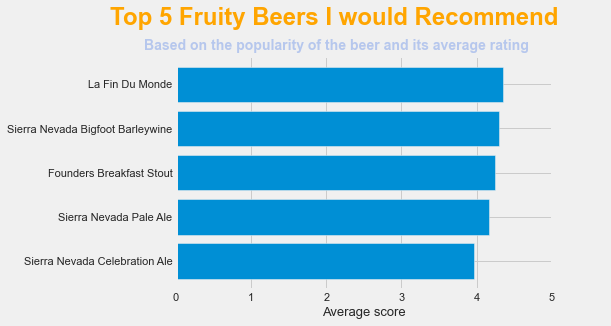

In [ ]:
x = top_fruity_beers["mean_review_overall"] 
y = top_fruity_beers["beer_name"] 
plt.style.use('fivethirtyeight')
plt.barh(top_fruity_beers['beer_name'],top_fruity_beers['mean_review_overall'])
plot = plt.suptitle('Top 5 Fruity Beers I would Recommend       ', fontweight='bold', color = 'orange', fontsize=24, y=1.05)
plt.title('Based on the popularity of the beer and its average rating              ',fontweight='bold', fontsize=14, y=1, color="#B6C7ED")
plt.xlim([0, 5])
plt.legend().remove()
plt.xlabel('Average score', fontsize=13)
#plt.xticks(rotation=45)
plt.show()

## Question 5. Which Beer style seems to be the favorite based on reviews written by users? 

This task is a little bit more complicated than the NLP task performed in Question 4. The NLP previous task was slow so it is very likely that this sentiment task is hard to execute without using a distributed system. So in this ocassion I am going to use Spark for a faster transformation of the data. Additionally, there are some useful preprocessing libraries that will make de work easier. Finally, I can also use a pre-trained sentiment model, that will make easier the task of finding the overall emotion of each review, focusing in three of them: negative, positive and neutral.

Prepare Spark Environment

In [ ]:
import findspark
findspark.init('C:/Spark') 

In [ ]:
import sparknlp
from sparknlp.pretrained import PretrainedPipeline
from sparknlp.annotator import *
from sparknlp.common import *
from sparknlp.base import *

import pyspark
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from pyspark import SparkContext
from pyspark import SparkConf
from pyspark.sql import SQLContext
import re

In [ ]:
spark = sparknlp.start()
sqlContext = SQLContext(spark)

C:/Spark\python\pyspark\sql\context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [ ]:
#Load original data into a Spark dataframe
df_Spark = (spark.read.format("csv").options(header="true").load("BeerDataScienceProject/BeerDataScienceProject.csv"))

In [ ]:
df_Spark.show() #This is how the spark dataframe looks like

+--------+-----------+-------------+--------------------+--------------------+-----------------+--------------+--------------+------------+------------------+------------+--------------------+--------------------+
|beer_ABV|beer_beerId|beer_brewerId|           beer_name|          beer_style|review_appearance|review_palette|review_overall|review_taste|review_profileName|review_aroma|         review_text|         review_time|
+--------+-----------+-------------+--------------------+--------------------+-----------------+--------------+--------------+------------+------------------+------------+--------------------+--------------------+
|       5|      47986|        10325|        Sausa Weizen|          Hefeweizen|              2.5|             2|           1.5|         1.5|           stcules|         1.5|A lot of foam. Bu...|          1234817823|
|     6.2|      48213|        10325|            Red Moon|  English Strong Ale|                3|           2.5|             3|           3|     

Definition of the Sentiment Analysis Spark NLP pipelines

For the preprocessing I am going to use the prebuilt NLP pipelines developed by John Snow Labs: https://nlp.johnsnowlabs.com/

In [ ]:
document = DocumentAssembler()\
    .setInputCol("review_text")\
    .setOutputCol("document") \
    .setCleanupMode("shrink_full") #remove new lines and tabs, plus shrinking spaces and blank lines.

#The Universal Sentence Encoder encodes text into high-dimensional vectors
use = UniversalSentenceEncoder.pretrained(name="tfhub_use", lang="en")\
 .setInputCols(["document"])\
 .setOutputCol("sentence_embeddings")

#Sentiment Analysis
sentiment = SentimentDLModel.pretrained("sentimentdl_use_twitter")\
 .setInputCols(["sentence_embeddings"])\
 .setOutputCol("sentiment")

# sentiment2 = SentimentDLModel.pretrained("sentimentdl_use_imdb")\
#  .setInputCols(["sentence_embeddings"])\
#  .setOutputCol("sentiment")

finisher = Finisher() \
    .setInputCols(["sentiment"]) \
    .setOutputCols("final_sentiment")\
    .setOutputAsArray(True) \
    .setCleanAnnotations(False)

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[ — ]

In [ ]:
#Define stages of the pipeline
nlpPipeline_sentiment2 = Pipeline(
      stages = [document,
                use,
                sentiment,
                finisher])

Now we can pass our text through the pipeline to get the overall sentiment of each review

In [ ]:
sentiment = nlpPipeline_sentiment2.fit(df_Spark).transform(df_Spark)
sentiment_df = sentiment.selectExpr("explode(arrays_zip(document, sentiment)) as out") \
                            .selectExpr("out.document.result as preprocessed_review_text", "out.sentiment.result as sentiment")
sentiment_df.show(20, truncate=100)

+----------------------------------------------------------------------------------------------------+---------+
|                                                                            preprocessed_review_text|sentiment|
+----------------------------------------------------------------------------------------------------+---------+
|A lot of foam. But a lot. In the smell some banana, and then lactic and tart. Not a good start. Q...| negative|
|Dark red color, light beige foam, average. In the smell malt and caramel, not really light. Again...| positive|
|Almost totally black. Beige foam, quite compact, not bad. Light smell, just a bit of roast, and s...| positive|
|Golden yellow color. White, compact foam, quite creamy. Good appearance. Fresh smell, with good h...|  neutral|
|According to the website, the style for the Caldera Cauldron changes every year. The current rele...| negative|
|Poured from the bottle into a Chimay goblet. Appearance: Pours a slightly cloudy yellow/orange 

In [ ]:
#Transform to pandas dataframe
sentiment_df = sentiment_df.toPandas()
sentiment_df.shape

(528870, 2)

In [ ]:
beer_df.shape

(528870, 13)

The shapes of the sentiment dataframe and the original beer dataframe match, so the task was performed correctly.

In [ ]:
sentiment_df.head()

,preprocessed_review_text,sentiment
0,A lot of foam. But a lot. In the smell some ba...,negative
1,"Dark red color, light beige foam, average. In ...",positive
2,"Almost totally black. Beige foam, quite compac...",positive
3,"Golden yellow color. White, compact foam, quit...",neutral
4,"According to the website, the style for the Ca...",negative


<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

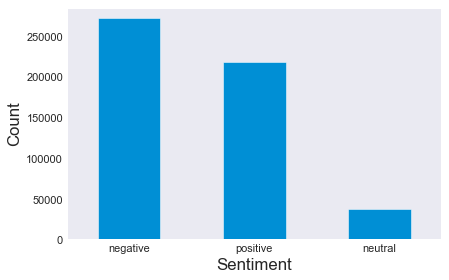

In [152]:
#Distribution of reviews
sentiment_df["sentiment"].value_counts().plot(kind='bar', xlabel='Sentiment', ylabel='Count', rot=0)

In [ ]:
#Export spark dataframe to avoid all the sentiment pipeline in the future
sentiment_df.to_csv("beer_dataset_sentiment.csv")

In [151]:
sentiment_df = pd.read_csv("beer_dataset_sentiment.csv")

Let's Merge the sentiment dataset with the original one so that we have the associated beer style.

In [ ]:
sentiment_and_styles = pd.merge(sentiment_df[['sentiment']], beer_df[['beer_style']], left_index=True, right_index=True)
sentiment_and_styles.head()

,sentiment,beer_style
0,negative,Hefeweizen
1,positive,English Strong Ale
2,positive,Foreign / Export Stout
3,neutral,German Pilsener
4,negative,American Double / Imperial IPA


In [ ]:
#Drop NAs
sentiment_and_styles.drop(sentiment_and_styles[sentiment_and_styles["beer_style"].isna()].index, inplace=True)
sentiment_and_styles.drop(sentiment_and_styles[sentiment_and_styles["sentiment"].isna()].index, inplace=True)

Now let's get for each beer_style, the proportion of Positive, Negative and Neutral reviews. An easy way to do this is by applying One Hot Encoding to the column sentiment.

In [ ]:
sentiment_and_styles = pd.merge(sentiment_and_styles, pd.get_dummies(sentiment_and_styles["sentiment"]), left_index=True, right_index=True)
sentiment_and_styles.head()

,sentiment,beer_style,negative,neutral,positive
0,negative,Hefeweizen,1,0,0
1,positive,English Strong Ale,0,0,1
2,positive,Foreign / Export Stout,0,0,1
3,neutral,German Pilsener,0,1,0
4,negative,American Double / Imperial IPA,1,0,0


In [ ]:
sentiment_and_styles.groupby('beer_style', as_index=False).count().sort_values('positive', ascending=False)

,beer_style,sentiment,negative,neutral,positive
12,American IPA,43363,43363,43363,43363
9,American Double / Imperial IPA,26101,26101,26101,26101
11,American Double / Imperial Stout,23352,23352,23352,23352
14,American Pale Ale (APA),20514,20514,20514,20514
2,American Amber / Red Ale,18728,18728,18728,18728
...,...,...,...,...,...
91,Sahti,139,139,139,139
72,Kvass,118,118,118,118
62,Gose,90,90,90,90
64,Happoshu,55,55,55,55


In [ ]:
sentiment_and_styles = sentiment_and_styles.groupby('beer_style', as_index=False).agg({'negative': 'mean', 'neutral': 'mean', 'positive': ['mean']})

In [ ]:
sentiment_and_styles.head()

,beer_style,negative,neutral,positive
,,mean,mean,mean
0,Altbier,0.449420,0.073375,0.477205
1,American Adjunct Lager,0.700999,0.083125,0.215876
2,American Amber / Red Ale,0.487185,0.064449,0.448366
3,American Amber / Red Lager,0.631005,0.077002,0.291993
4,American Barleywine,0.522014,0.081528,0.396458


Merge the columns names into one single level

In [ ]:
sentiment_and_styles.columns = sentiment_and_styles.columns.map('|'.join).str.strip('|')
sentiment_and_styles.head()

,beer_style,negative|mean,neutral|mean,positive|mean
0,Altbier,0.449420,0.073375,0.477205
1,American Adjunct Lager,0.700999,0.083125,0.215876
2,American Amber / Red Ale,0.487185,0.064449,0.448366
3,American Amber / Red Lager,0.631005,0.077002,0.291993
4,American Barleywine,0.522014,0.081528,0.396458


Finally, we can plot the beer styles with the highest proportion of positive reviews!

In [ ]:
#Get top N beer stules based in proportion of positive reviews
top_beer_styles = sentiment_and_styles.sort_values('positive|mean', ascending=False)[0:5]
#Reorder and rename columns
top_beer_styles = top_beer_styles[["beer_style", "positive|mean", "neutral|mean", "negative|mean"]].rename(columns={"negative|mean": "negative", "neutral|mean": "neutral", "positive|mean": "positive"})
top_beer_styles.head()

,beer_style,positive,neutral,negative
71,Kristalweizen,0.555556,0.035354,0.409091
38,Dortmunder / Export Lager,0.551133,0.062465,0.386401
100,Weizenbock,0.536465,0.071588,0.391946
88,Roggenbier,0.509804,0.058824,0.431373
98,Tripel,0.492948,0.066305,0.440746


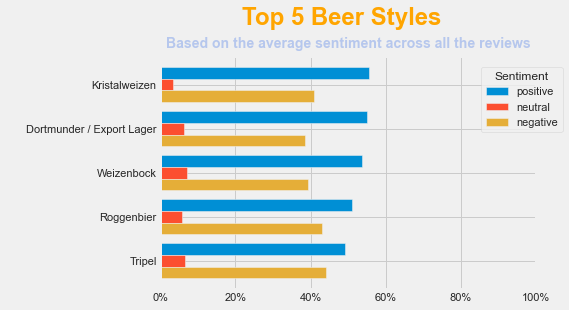

In [ ]:
plt.style.use('fivethirtyeight')
#plt.barh(top_beer_styles['beer_style'],top_beer_styles['positive|mean'])
top_beer_styles.set_index('beer_style').plot.barh(width = 0.8).invert_yaxis()
plot = plt.suptitle('Top 5 Beer Styles', fontweight='bold', color = 'orange', fontsize=24, y=1.05)
plt.title('Based on the average sentiment across all the reviews',fontweight='bold', fontsize=14, y=1.01, color="#B6C7ED")
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.legend(bbox_to_anchor=(1.1, 1), loc='upper right', borderaxespad=1).set_title("Sentiment") 
plt.xlim([0, 1])
plt.ylabel(' ')
plt.xticks([0.0, 0.20, 0.40, 0.60, 0.80, 1], ["0%", "20%", "40%", "60%", "80%", "100%"])
#plot.axes.get_xaxis().set_visible(False)
#plt.xlabel('Proportion of Positive, Neutral and Negative Reviews')
plt.show()

## Question 6. How does written review compare to overall review score for the beer styles?

For this question I am going to analize the overall sentiment in th reviews for each beer style and and compare it to the average overall rating of that beer. Then I will get some insights to see if in general, the sentiment matches the rating of the beer.

Since I already got the ovearall sentiment of each review in Question 5, I am going to load that same dataset and start from there.

In [113]:
sentiment_df = pd.read_csv("beer_dataset_sentiment.csv")

Now that we have the predominant sentiment for each review, let's evaluate if the average sentiment matches the average score of the beer style. For so, let's first create a copy of the original beer dataset that only includes columns beer style and overall review 

In [114]:
scores_reviews = beer_df[['beer_style','review_overall']].copy()
scores_reviews.shape

(528870, 2)

Now we can merge the two dataframes containing sentiment and score

In [134]:
sentiment_and_scores = pd.merge(sentiment_df, scores_reviews, left_index=True, right_index=True)
sentiment_and_scores.head()

,Unnamed: 0,preprocessed_review_text,sentiment,beer_style,review_overall
0,0,A lot of foam. But a lot. In the smell some ba...,negative,Hefeweizen,1.5
1,1,"Dark red color, light beige foam, average. In ...",positive,English Strong Ale,3.0
2,2,"Almost totally black. Beige foam, quite compac...",positive,Foreign / Export Stout,3.0
3,3,"Golden yellow color. White, compact foam, quit...",neutral,German Pilsener,3.0
4,4,"According to the website, the style for the Ca...",negative,American Double / Imperial IPA,4.0


Drop rows where the beer style, the review or the review score is missing

In [135]:
sentiment_and_scores.drop(sentiment_and_scores[sentiment_and_scores["beer_style"].isna()].index, inplace=True)
sentiment_and_scores.drop(sentiment_and_scores[sentiment_and_scores["preprocessed_review_text"].isna()].index, inplace=True)
sentiment_and_scores.drop(sentiment_and_scores[sentiment_and_scores["review_overall"].isna()].index, inplace=True)
sentiment_and_scores.drop(sentiment_and_scores[sentiment_and_scores["sentiment"].isna()].index, inplace=True)

We don't need the text reviews anymore

In [136]:
sentiment_and_scores.drop(["preprocessed_review_text"], axis=1, inplace=True)
sentiment_and_scores.drop(["Unnamed: 0"], axis=1, inplace=True)

To get an initial idea of the relation between the sentiment and the score of the beer, we can plot their distributions.

<AxesSubplot:>

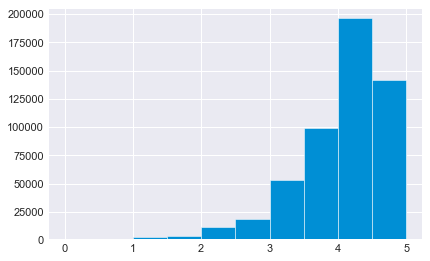

In [137]:
sentiment_and_scores["review_overall"].hist()

<AxesSubplot:>

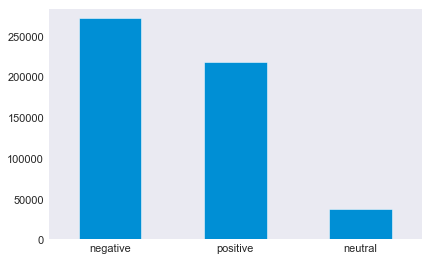

In [123]:
sentiment_and_scores["sentiment"].value_counts().plot(kind='bar', rot=0)

In the upper plot, we can see that the predominant ratings are high (4 or 5). However, the sentiment plot shows us that in the majority of the reviews predomines a negative emotion. We will talk about this later but firs't let's get a more accurate result.

Let's consider the following relation between sentiment and review score:

    - POSITIVE: 4,5
    - NEUTRAL: 3
    - NEGATIVE: 1,2

Now we can set a flag in each row that tells us when those relations are met

In [ ]:
sentiment_and_scores.head()

,sentiment,beer_style,review_overall
0,negative,Hefeweizen,1.5
1,positive,English Strong Ale,3.0
2,positive,Foreign / Export Stout,3.0
3,neutral,German Pilsener,3.0
4,negative,American Double / Imperial IPA,4.0


In [126]:
def get_score_sentiment_relation_flag(sentiment, score):

    if((sentiment == "negative") and (score <= 2)) | ((sentiment == "positive") and (score >= 2)) | ((sentiment == "neutral") and (score > 2 and score <4)):
        return True
    else:
        return False

In [127]:
sentiment_and_scores["score_sentiment_relation"] = sentiment_and_scores.apply(lambda x: get_score_sentiment_relation_flag(x["sentiment"], x["review_overall"]), axis=1)
sentiment_and_scores.head()

,sentiment,beer_style,review_overall,score_sentiment_relation
0,negative,Hefeweizen,1.5,True
1,positive,English Strong Ale,3.0,True
2,positive,Foreign / Export Stout,3.0,True
3,neutral,German Pilsener,3.0,True
4,negative,American Double / Imperial IPA,4.0,False


Now let's get the relation between score and written review by ber style. For so, I am going to retrieve the predominant emotion and the average score for each beer.

In [128]:
#Get average overall review score per beer style
avg_reviews = sentiment_and_scores.groupby('beer_style', as_index=False)['review_overall'].mean()
avg_reviews.head()

,beer_style,review_overall
0,Altbier,3.874528
1,American Adjunct Lager,3.118030
2,American Amber / Red Ale,3.857738
3,American Amber / Red Lager,3.387564
4,American Barleywine,3.920394


In [129]:
#Get average overall review score per beer style
avg_sentiment = sentiment_and_scores.groupby('beer_style', as_index=False)['sentiment'].apply(lambda x: x.value_counts().index[0])
avg_sentiment.head()

,beer_style,sentiment
0,Altbier,positive
1,American Adjunct Lager,negative
2,American Amber / Red Ale,negative
3,American Amber / Red Lager,negative
4,American Barleywine,negative


In [130]:
#Merge the datarames
avg_sentiment_and_scores = pd.merge(avg_sentiment, avg_reviews, how='outer', on=['beer_style']).sort_values(by=['review_overall'], ascending=False)
avg_sentiment_and_scores.head()

,beer_style,sentiment,review_overall
63,Gueuze,negative,4.140952
27,Berliner Weissbier,negative,4.133976
11,American Double / Imperial Stout,negative,4.100424
83,Oatmeal Stout,negative,4.080804
41,Eisbock,positive,4.079487


Just in the first rows we can easily see how the average score doesnt match the overall sentiment. Let's get those matching flags again and plot the results.

In [131]:
avg_sentiment_and_scores["avg_score_sentiment_relation"] = avg_sentiment_and_scores.apply(lambda x: get_score_sentiment_relation_flag(x["sentiment"], x["review_overall"]), axis=1)
avg_sentiment_and_scores.head()

,beer_style,sentiment,review_overall,avg_score_sentiment_relation
63,Gueuze,negative,4.140952,False
27,Berliner Weissbier,negative,4.133976,False
11,American Double / Imperial Stout,negative,4.100424,False
83,Oatmeal Stout,negative,4.080804,False
41,Eisbock,positive,4.079487,True


In [132]:
avg_sentiment_and_scores["avg_score_sentiment_relation"].value_counts()

False    86
True     18
Name: avg_score_sentiment_relation, dtype: int64

<AxesSubplot:ylabel='Percentage(%)'>

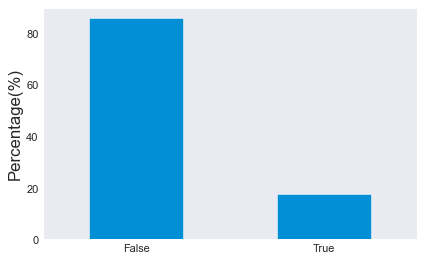

In [133]:
#Plot stats for each type of sentiment
avg_sentiment_and_scores["avg_score_sentiment_relation"].value_counts().plot(kind='bar', xlabel='', ylabel='Percentage(%)', rot=0)
#TODO Pretty and change True-False names. Get plot by sentiment

Based on these results, where there is a mismatching of 86% between sentiment and score, two things may be happening:

    - Users tend to express more the negative thoughts, even though their overall opinion regarding the beer is positive.
    - The Sentiment Model didn't perform very well in detecting the overall sentiment of the reviews.

## Question 7. How do find similar beer drinkers by using written reviews only?   

For this question, I am going to build a simple recommender system to find the similarity across the reviews, and thus, the users.
For so, I am going to use TFIDF and cosine similarity

- TF-IDF, or term frequency-inverse document frequency rates the relevance or significance of string representations in a text, such as words, sentences, and lemmas.
- Cosine Similarity measures the similarity between two vectors of an inner product space.


Let's use the dataframe with cleaned and preprocessed text that I generated in Question 4

In [138]:
reviews_beers_df = pd.read_csv('beer_dataset_preprocessed_reviews.csv', usecols= ['review_profileName', 'clean_text'])
reviews_beers_df.head()

,review_profileName,clean_text
0,stcules,lot foam lot smell banana lactic tart good sta...
1,stcules,dark red color light beige foam average smell ...
2,stcules,almost totally black beige foam quite compact ...
3,stcules,golden yellow color white compact foam quite c...
4,johnmichaelsen,according website style caldera cauldron chang...


In [139]:
reviews_beers_df.isna().sum()

review_profileName    115
clean_text              0
dtype: int64

In [140]:
#Remove rows without a user name
reviews_beers_df.drop(reviews_beers_df[reviews_beers_df["review_profileName"].isna()].index, inplace=True)

Let's see how many unique users are

In [141]:
reviews_beers_df.nunique()

review_profileName     22789
clean_text            528242
dtype: int64

Let's encode the profile names into numeric values to avoid memory issues

In [142]:
reviews_beers_df['review_profileId'] = reviews_beers_df.review_profileName.astype('category').cat.codes
reviews_beers_df.head()

,review_profileName,clean_text,review_profileId
0,stcules,lot foam lot smell banana lactic tart good sta...,20861
1,stcules,dark red color light beige foam average smell ...,20861
2,stcules,almost totally black beige foam quite compact ...,20861
3,stcules,golden yellow color white compact foam quite c...,20861
4,johnmichaelsen,according website style caldera cauldron chang...,15740


In [143]:
#Add number of reviews per user
reviews_beers_df["number_reviews"] = reviews_beers_df.groupby('review_profileId')['review_profileId'].transform('size')
reviews_beers_df.head()

,review_profileName,clean_text,review_profileId,number_reviews
0,stcules,lot foam lot smell banana lactic tart good sta...,20861,561
1,stcules,dark red color light beige foam average smell ...,20861,561
2,stcules,almost totally black beige foam quite compact ...,20861,561
3,stcules,golden yellow color white compact foam quite c...,20861,561
4,johnmichaelsen,according website style caldera cauldron chang...,15740,657


Create a reference table with the mapping between user, Id and number of reviews

In [144]:
#Create a df with the mapping between user name and user id
user_name_id = reviews_beers_df[['review_profileName', 'review_profileId', 'number_reviews']].drop_duplicates().reset_index(drop=True)
user_name_id.head()

,review_profileName,review_profileId,number_reviews
0,stcules,20861,561
1,johnmichaelsen,15740,657
2,oline73,18583,231
3,Reidrover,7049,380
4,alpinebryant,9611,174


In [145]:
user_name_id["number_reviews"].describe()

count    22789.000000
mean        23.196849
std         70.341671
min          1.000000
25%          1.000000
50%          3.000000
75%         12.000000
max       1858.000000
Name: number_reviews, dtype: float64

<AxesSubplot:>

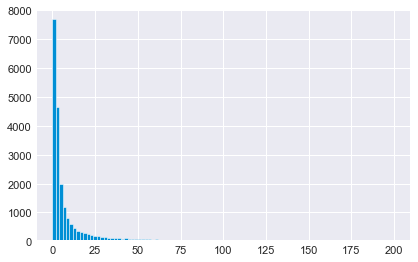

In [146]:
user_name_id["number_reviews"].hist(bins=100, range=[0, 200])
#TODO add title

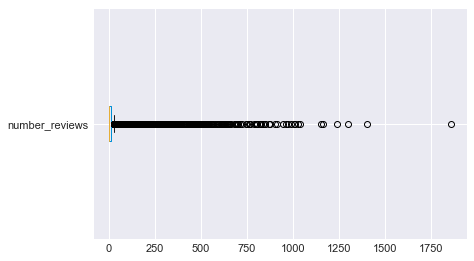

In [147]:
boxplot = user_name_id.boxplot(column=['number_reviews'], vert=False)  

There is a 50% of the users with 3 reviews or less. This is a problem when building a recommendation system since there is not enough data for some users to be able to find similarities with other users. For so, I am going to proceed with the users that has at least 10 reviews.

Remove column review_profileName since we have the other dataframe to use as a mapping

In [148]:
#Dop column review_profileName
reviews_beers_df.drop("review_profileName", axis=1, inplace=True)
reviews_beers_df.head()

,clean_text,review_profileId,number_reviews
0,lot foam lot smell banana lactic tart good sta...,20861,561
1,dark red color light beige foam average smell ...,20861,561
2,almost totally black beige foam quite compact ...,20861,561
3,golden yellow color white compact foam quite c...,20861,561
4,according website style caldera cauldron chang...,15740,657


Keep only the users with more than 10 reviews

In [149]:
reviews_beers_df = reviews_beers_df[reviews_beers_df['number_reviews'] > 20]
reviews_beers_df.shape

(456248, 3)

In [150]:
#Join all the reviews by user to treat them as one corpus
joined_reviews = reviews_beers_df[['review_profileId', 'clean_text']].groupby('review_profileId').agg(' '.join).reset_index()
joined_reviews

,review_profileId,clean_text
0,0,got trade somebody thanks opaque black dark br...
1,3,bottled purchased julio liquors westborough ma...
2,8,excited brew third one brewery complaints yet ...
3,28,afterwork brew robert burns day treat appearan...
4,36,thank misterhops pours black night small brown...
...,...,...
4324,22764,beer pours clear attractive shade ruby brown m...
4325,22765,poured oz bottle straight sided pint glass app...
4326,22769,pours nice yellow golden color finger head nic...
4327,22773,appearance pours hazy yellow amber moderate eg...


After excuting this part I realized that there are words that are not in the english dictionary (e.g. aaaahh, eeeyy, eeh, etc.), so I am going to remove them from the review texts.
I tried to do add this step in the preprocessing part but it was taking too long. If I was using Spark, which is faster, I would definitely include this in the preprocessing pipeine with the rest of the steps.

In [ ]:
import nltk
words = set(nltk.corpus.words.words())

joined_reviews["clean_text"] = [" ".join(w for w in nltk.wordpunct_tokenize(x) 
                         if w.lower() in words) 
                         for x in joined_reviews["clean_text"]]
joined_reviews.head()

,review_profileId,clean_text
0,0,got trade somebody thanks opaque black dark br...
1,3,bottled julio mass price bomber frog come guy ...
2,8,excited brew third one brewery yet ba bottle w...
3,28,afterwork brew day treat appearance lively sma...
4,36,thank black night small brown head nose amazin...


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

Tfidf_vect = TfidfVectorizer()
vector_matrix = Tfidf_vect.fit_transform(joined_reviews['clean_text'])
tokens = Tfidf_vect.get_feature_names()

In [ ]:
review_profileId = joined_reviews['review_profileId']
vector_matrix_df = pd.DataFrame(data=vector_matrix.toarray(), index=review_profileId, columns=tokens)
vector_matrix_df

,aa,aal,aam,aba,aback,abacus,abandon,abandoned,abandonment,abas,...,zone,zoning,zoo,zoom,zorro,zounds,zowie,zucchini,zwieback,zymurgy
review_profileId,,,,,,,,,,,,,,,,,,,,,
0,0.021543,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22764,0.000000,0.0,0.0,0.0,0.003363,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22765,0.000000,0.0,0.0,0.0,0.009196,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22769,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

#get pairwise similarities between all samples in vector_matrix
cosine_similarity_matrix = cosine_similarity(vector_matrix) 
#Convert to dataframe
cosine_similarity_df = pd.DataFrame(data=cosine_similarity_matrix, index=review_profileId, columns=review_profileId)
cosine_similarity_df

review_profileId,0,3,8,28,36,42,53,78,83,85,...,22740,22743,22746,22750,22761,22764,22765,22769,22773,22785
review_profileId,,,,,,,,,,,,,,,,,,,,,
0,1.000000,0.483075,0.493136,0.415329,0.513497,0.417000,0.528434,0.359105,0.552174,0.399219,...,0.456354,0.540185,0.520551,0.494914,0.600506,0.589563,0.487732,0.468455,0.463272,0.413179
3,0.483075,1.000000,0.473516,0.490897,0.487994,0.486469,0.520533,0.401002,0.559191,0.436085,...,0.462908,0.563508,0.524243,0.516643,0.537433,0.508729,0.537032,0.417078,0.557181,0.435211
8,0.493136,0.473516,1.000000,0.481470,0.598935,0.650622,0.595328,0.618701,0.543657,0.388774,...,0.606447,0.581441,0.525906,0.595492,0.624873,0.665936,0.628344,0.528164,0.480788,0.635383
28,0.415329,0.490897,0.481470,1.000000,0.498915,0.603996,0.488314,0.501433,0.451463,0.362354,...,0.496990,0.586550,0.502488,0.568020,0.488253,0.474009,0.572130,0.465376,0.657137,0.456950
36,0.513497,0.487994,0.598935,0.498915,1.000000,0.619143,0.547832,0.541339,0.532874,0.358998,...,0.618955,0.631406,0.583411,0.642415,0.579433,0.590224,0.598275,0.579044,0.543521,0.497676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22764,0.589563,0.508729,0.665936,0.474009,0.590224,0.605349,0.657412,0.522858,0.634965,0.447959,...,0.586564,0.665578,0.624862,0.665811,0.680023,1.000000,0.624772,0.624902,0.509288,0.643258
22765,0.487732,0.537032,0.628344,0.572130,0.598275,0.670492,0.631491,0.641150,0.555457,0.378396,...,0.654681,0.730386,0.631992,0.659183,0.584523,0.624772,1.000000,0.571211,0.582014,0.603600
22769,0.468455,0.417078,0.528164,0.465376,0.579044,0.614130,0.544376,0.449702,0.504533,0.371830,...,0.513084,0.665882,0.638842,0.597051,0.500477,0.624902,0.571211,1.000000,0.507281,0.558756


In [ ]:
#### Helper functions ####

In [ ]:
#Get the similarity scores of 2 given documents
def get_docs_similarity(doc1, doc2):
    return cosine_similarity_df.loc[doc1][doc2]

In [ ]:
#print the top 3 similar documents given a dictionary with a document and its similarities, get the top 3 scores
def get_top_n_similar_documents(dictionary, n):
    sorted_dictionary = {}
    my_keys = sorted(dictionary, key=dictionary.get, reverse=True)[1:n+1] #Exclude highest value (1), which is the document itself
    for key in my_keys:
        sorted_dictionary[key] = round(dictionary.get(key),4) * 100 #Get rounded value in %
        print(" - User Id ", key, ": ", sorted_dictionary[key], "% similarity")
    
    return sorted_dictionary

In [ ]:
#given a document id, get the similarity with the other documents 
def get_similarity_scores(doc, n):
    dictionary = {}
    for id in review_profileId:
        dictionary[id] = get_docs_similarity(doc, id)    
    get_top_n_similar_documents(dictionary, n)

Finally, let's get the top 3 most similar users for each profile, based on the similarity of their written reviews. As an example, I am going to limit the output by getting the top 3 similar users for 10 users.

In [ ]:
# Get the N most similar users for each user and their similarity scores (in %)
review_profileId_reduced = review_profileId[0:10] #Limit to 10 users

for doc in review_profileId_reduced:
    print("\nUser with ID ", doc, " is similar to the following users:")
    get_similarity_scores(doc, 3) # n=3 -> Get top 3


User with ID  0  is similar to the following users:
 - User Id  14598 :  67.42 % similarity
 - User Id  9532 :  67.32000000000001 % similarity
 - User Id  8893 :  67.05 % similarity

User with ID  3  is similar to the following users:
 - User Id  19911 :  62.96000000000001 % similarity
 - User Id  14518 :  62.25000000000001 % similarity
 - User Id  483 :  61.8 % similarity

User with ID  8  is similar to the following users:
 - User Id  19118 :  74.77000000000001 % similarity
 - User Id  10842 :  74.46000000000001 % similarity
 - User Id  2735 :  73.83 % similarity

User with ID  28  is similar to the following users:
 - User Id  5691 :  68.81 % similarity
 - User Id  19367 :  67.7 % similarity
 - User Id  14741 :  67.15 % similarity

User with ID  36  is similar to the following users:
 - User Id  5327 :  70.46 % similarity
 - User Id  10659 :  69.76 % similarity
 - User Id  17204 :  69.42 % similarity

User with ID  42  is similar to the following users:
 - User Id  12032 :  78.5 % 